# Simple Perceptron Model

In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## Create synthetic sample data

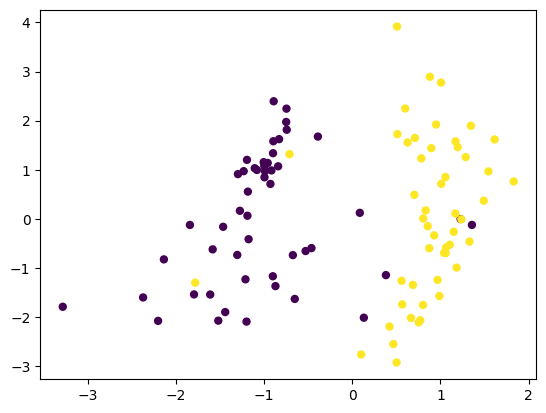

In [2]:
X_train, y_train = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=40)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train, s=25)
plt.show()

## The model

In [6]:
class Perceptron:

    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.init_weights()

    def init_weights(self):
        self.weights = torch.rand(2)
        self.bias = torch.Tensor([0])

    def fit(self, X, y):
        X = torch.Tensor(X)
        y = torch.Tensor(y)
        for epoch in range(self.epochs):
            total_error = 0
            for xi, yi in zip(X, y):
                y_pred = self.predict(xi)
                error = yi - y_pred
                self.weights += self.lr * error * xi
                self.bias += self.lr * error
                total_error += error
            if epoch % 10 == 0:
                print(f'epoch {epoch} \t error {total_error}')

    def predict(self, X, activation=True):
        X = torch.Tensor(X)
        output = X @ self.weights + self.bias
        if activation:
            output = torch.where(output >= 0.0, 1, 0)
        return output

## Predict with random weigths

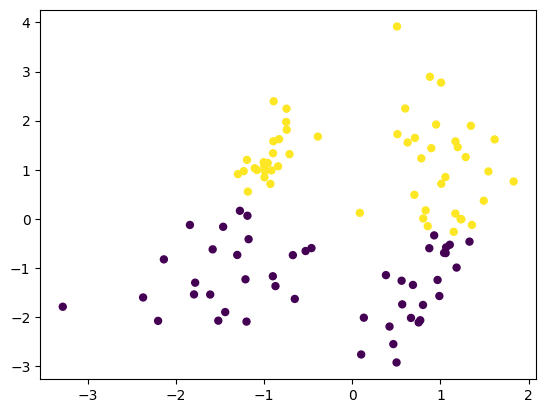

In [7]:
perceptron = Perceptron(lr=0.01, epochs=40)
y_pred = perceptron.predict(X_train, activation=True)

plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_pred, s=25)
plt.show()

## Predict with trained weights

epoch 0 	 error tensor([2.])
epoch 10 	 error tensor([0.])
epoch 20 	 error tensor([1.])
epoch 30 	 error tensor([0.])
epoch 40 	 error tensor([0.])
epoch 50 	 error tensor([1.])
epoch 60 	 error tensor([0.])
epoch 70 	 error tensor([0.])
epoch 80 	 error tensor([0.])
epoch 90 	 error tensor([1.])
epoch 100 	 error tensor([-1.])
epoch 110 	 error tensor([-1.])
epoch 120 	 error tensor([1.])
epoch 130 	 error tensor([0.])
epoch 140 	 error tensor([0.])
epoch 150 	 error tensor([0.])
epoch 160 	 error tensor([1.])
epoch 170 	 error tensor([1.])
epoch 180 	 error tensor([-1.])
epoch 190 	 error tensor([0.])


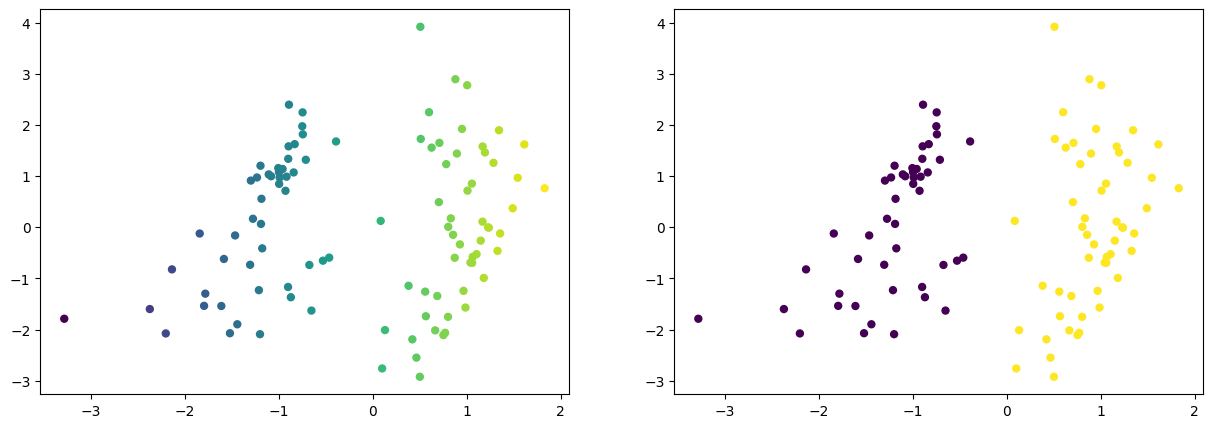

In [13]:
perceptron = Perceptron(lr=0.01, epochs=200)
perceptron.fit(X_train, y_train)
y_pred_smooth = perceptron.predict(X_train, activation=False)
y_pred = perceptron.predict(X_train)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(X_train[:,0], X_train[:,1], marker='o', c=y_pred_smooth, s=25)
ax[1].scatter(X_train[:,0], X_train[:,1], marker='o', c=y_pred, s=25)
plt.show()